In [4]:
#Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.stats import pearsonr
import statsmodels.api as sm

In [5]:
#Loading the dataframe at the project
df_user_behavior = pd.read_csv('user_behavior_dataset.csv')

In [6]:
#Printing the first 5 lines and the head of this dataframe
df_user_behavior.head(5)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


Obtained information:
- Device Model, Operating System, Gender and User Behavior Class are categorical variables
- App Usage Time (min/day), Screen on Time (hours/day), Battery Drain (mAh/day), Numbers of Apps Installed, Data Usage (MB/day) and Age are numerical variables

In [7]:
#Checking missing values
df_user_behavior.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [8]:
#Checking every variable type
df_user_behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


There is no missing values and all the variables types are correct to each category

In [9]:
#Getting info about the numerical variables
df_user_behavior.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


With this output, it is possible to identify:
- Ages between 18 and 59 years. There is no outliers or impossible variables.
- All the other variables points possible values for the existing data. Example: Screen on Time (hours/day), min 1 hour, max 12 hours and mean is 5.2

Improving the project, change the variable names

In [32]:
df_user_behavior.rename(columns={"Device Model":"Device_model","Operating System":"Operating_system","App Usage Time (min/day)":"App_usage_time","Screen On Time (hours/day)":"Screen_on_time","Battery Drain (mAh/day)":"Battery_drain","Number of Apps Installed":"Number_apps_installed","Data Usage (MB/day)":"Data_usage","User Behavior Class":"User_behavior"},inplace=True)
df_user_behavior

,User ID,Device_model,Operating_system,App_usage_time,Screen_on_time,Battery_drain,Number_apps_installed,Data_usage,Age,Gender,User_behavior
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


Creating regression models
Checking the relation between:
- Screen on Time and Number of apps installed
- Screen on time and battery drain
- Screen on time and data usage.


Model 01 - Screen on time and number of apps installed
Ploting a scatter graph with the regression line (fitted values)

<function matplotlib.pyplot.show(close=None, block=None)>

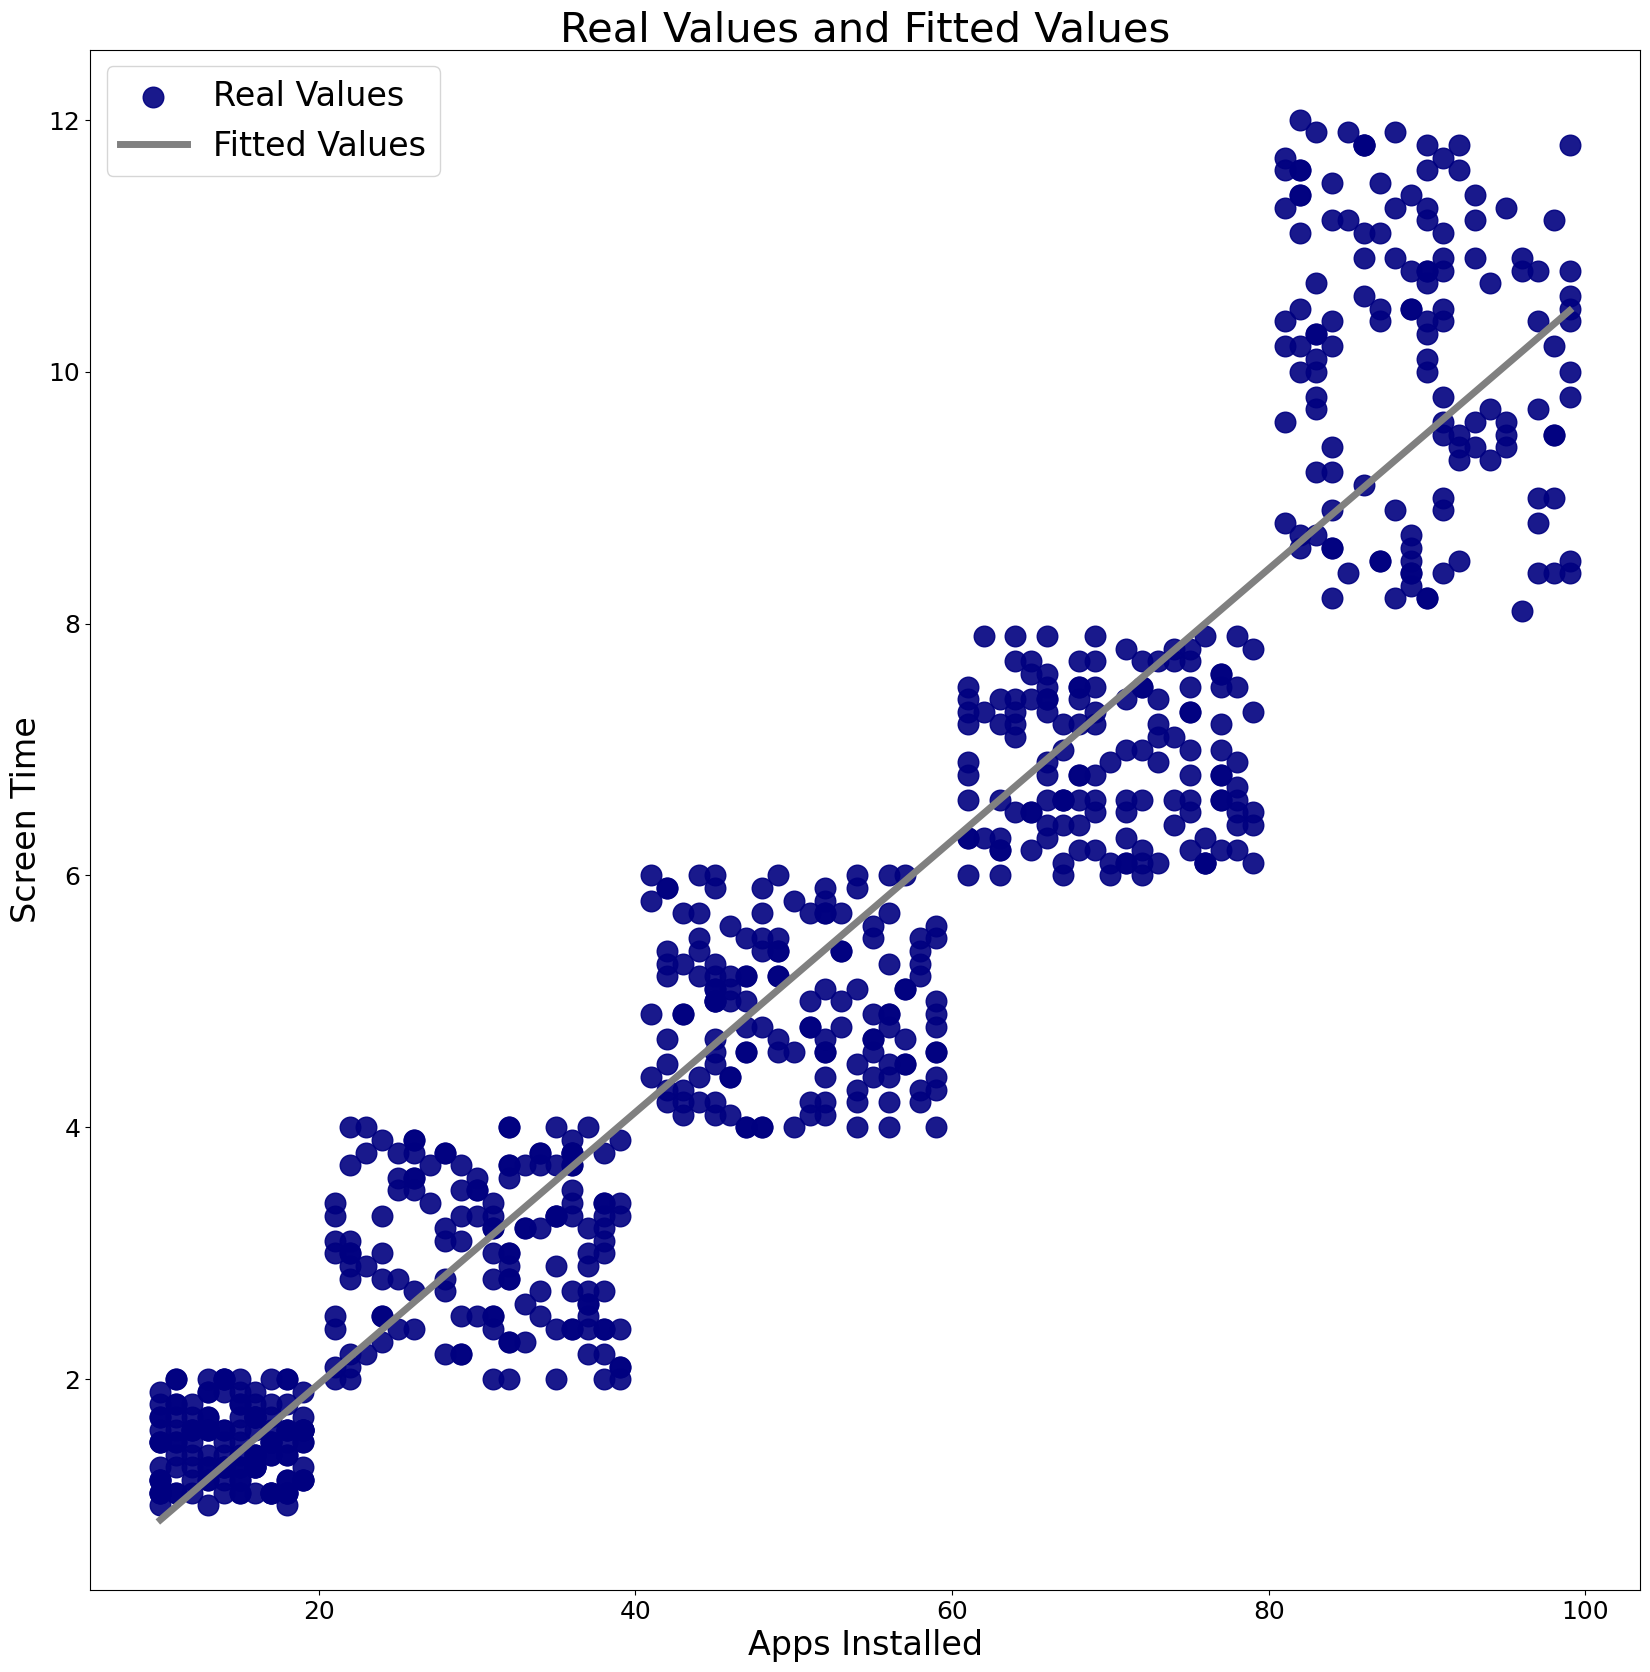

In [50]:
plt.figure(figsize=(20,20))
sns.regplot(data=df_user_behavior, x='Number_apps_installed', y='Screen_on_time', marker='o', ci=False,
            scatter_kws={"color":'navy', 'alpha':0.9, 's':220},
            line_kws={"color":'grey', 'linewidth': 5})
plt.title('Real Values and Fitted Values', fontsize=30)
plt.xlabel('Apps Installed', fontsize=24)
plt.ylabel('Screen Time', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(['Real Values', 'Fitted Values'], fontsize=24, loc='upper left')
plt.show

In [ ]:
#Creating the model
model1 = sm.OLS.from_formula('Screen_on_time ~ Number_apps_installed', df_user_behavior).fit()

In [ ]:
#Output of the model for analysis
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Screen_on_time   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     6063.
Date:                Mon, 11 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:17:04   Log-Likelihood:                -982.86
No. Observations:                 700   AIC:                             1970.
Df Residuals:                     698   BIC:                             1979.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.1933      0.079     -2.432      0.015      -0.349      -0.037
Number_apps_installed     0.1079      0.001     77.866      0.000       0.105       0.111
==============================================================================
Omnibus:                       27.157   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.516
Skew:                           0.442   Prob(JB):                     2.36e-07
Kurtosis:                       3.514   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the results, the R-Square indicates a good prectiditive capacity for the model

In [46]:
model1.predict(pd.DataFrame({'Number_apps_installed':[50]}))

0    5.199221
dtype: float64

In this situation, if a person has 50 apps in your smarppthone, it is probable that uses the smartphone for 5.1 hours in a day

Model 02 - Screen on time and battery drain

<function matplotlib.pyplot.show(close=None, block=None)>

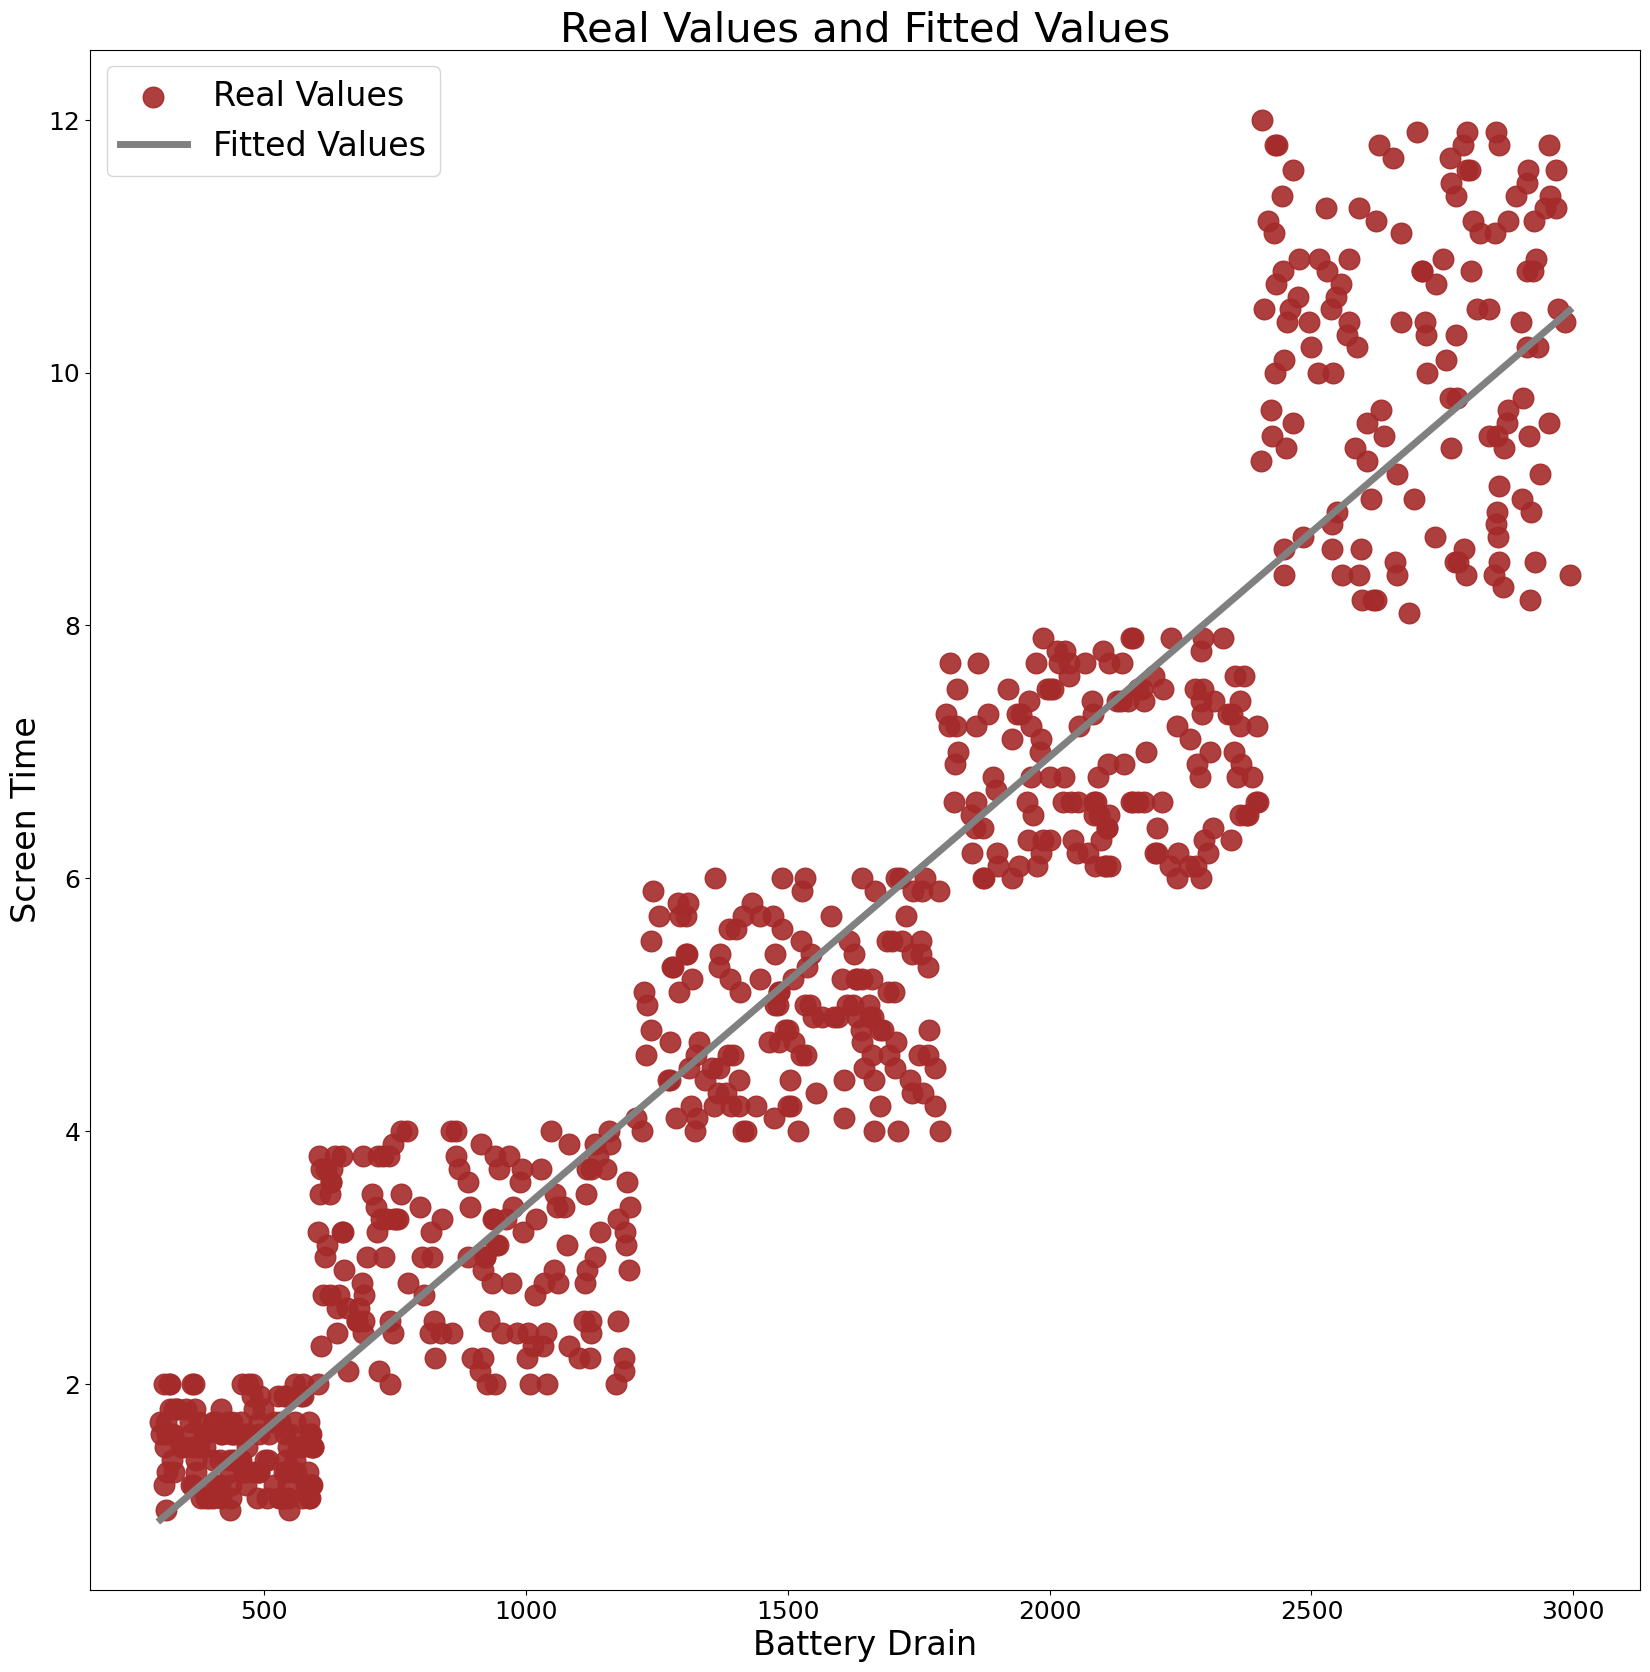

In [66]:
plt.figure(figsize=(20,20))
sns.regplot(data=df_user_behavior, x='Battery_drain', y='Screen_on_time', marker='o', ci=False,
            scatter_kws={"color":'brown', 'alpha':0.9, 's':220},
            line_kws={"color":'grey', 'linewidth': 5})
plt.title('Real Values and Fitted Values', fontsize=30)
plt.xlabel('Battery Drain', fontsize=24)
plt.ylabel('Screen Time', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(['Real Values', 'Fitted Values'], fontsize=24, loc='upper left')
plt.show

In [ ]:
#Creating the model
model2 = sm.OLS.from_formula('Screen_on_time ~ Battery_drain', df_user_behavior).fit()

In [ ]:
#Output of the results for analysis
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Screen_on_time   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     6322.
Date:                Mon, 11 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:22:32   Log-Likelihood:                -969.71
No. Observations:                 700   AIC:                             1943.
Df Residuals:                     698   BIC:                             1953.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.1492      0.077     -1.928      0.054      -0.301       0.003
Battery_drain     0.0036   4.47e-05     79.511      0.000       0.003       0.004
==============================================================================
Omnibus:                       22.368   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.767
Skew:                           0.423   Prob(JB):                     6.90e-06
Kurtosis:                       3.314   Cond. No.                     3.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

With the previous results, there is a high correlation between these two variables, indicating that the quantify of battery usage has high correlation with screen time

In [58]:
model2.predict(pd.DataFrame({'Battery_drain':[1000]}))

0    3.405773
dtype: float64

In an example, if a the usage is 1000 mah, the person had a use of 3.4 hours in a day

Model 03 - Screen on time and data usage

<function matplotlib.pyplot.show(close=None, block=None)>

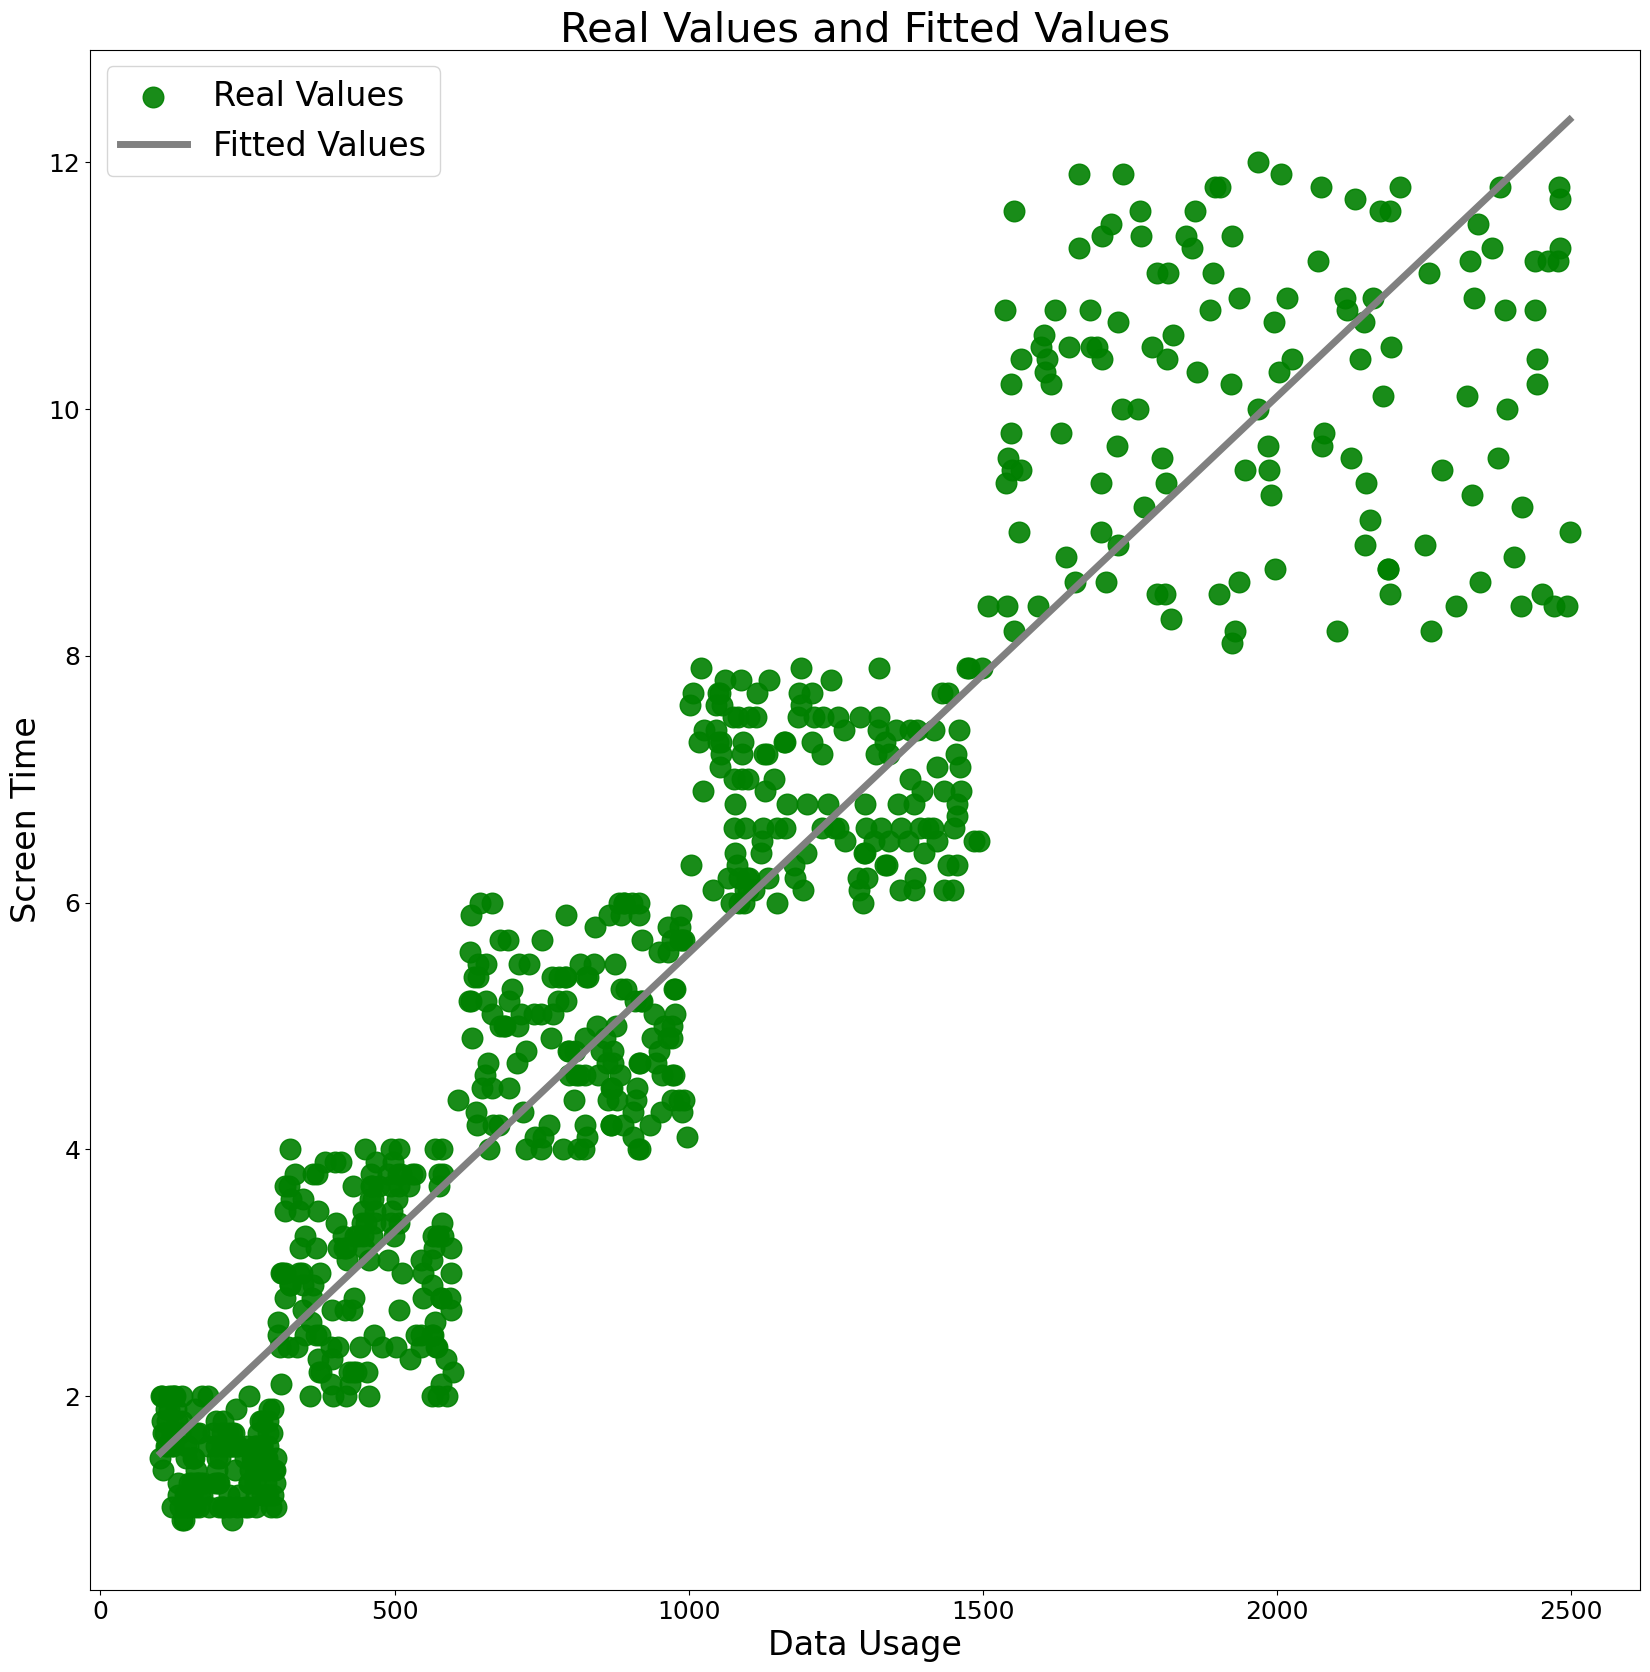

In [59]:
plt.figure(figsize=(20,20))
sns.regplot(data=df_user_behavior, x='Data_usage', y='Screen_on_time', marker='o', ci=False,
            scatter_kws={"color":'green', 'alpha':0.9, 's':220},
            line_kws={"color":'grey', 'linewidth': 5})
plt.title('Real Values and Fitted Values', fontsize=30)
plt.xlabel('Data Usage', fontsize=24)
plt.ylabel('Screen Time', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(['Real Values', 'Fitted Values'], fontsize=24, loc='upper left')
plt.show

In [ ]:
#Model Creation
model3 = sm.OLS.from_formula('Screen_on_time ~ Data_usage', df_user_behavior).fit()

In [ ]:
#Output of the results for analysis
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Screen_on_time   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     5429.
Date:                Mon, 11 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:27:55   Log-Likelihood:                -1017.3
No. Observations:                 700   AIC:                             2039.
Df Residuals:                     698   BIC:                             2048.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0794      0.069     15.624      0.000       0.944       1.215
Data_usage     0.0045   6.12e-05     73.685      0.000       0.004       0.005
==============================================================================
Omnibus:                       17.245   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.103
Skew:                          -0.003   Prob(JB):                     2.39e-08
Kurtosis:                       4.097   Cond. No.                     1.99e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As the same as previous models, there is a high correlation between the data usage and screen on time

In [62]:
model3.predict(pd.DataFrame({'Data_usage':[1500]}))

0    7.844653
dtype: float64

Nesse exemplo, uma pessoa que gasta 1500MB de dados por dia, ficou 7.8 horas com a tela ligada
In this example, if a person spends 15000mb of data in a day, the person spents 7.8 hours with the screen on

In [63]:
#ENDOFCODE